In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [315]:
def skew(text):
    score=[0]
    for c in text:
        if c=='G':
            score.append(score[-1]+1)
        elif c=='C':
            score.append(score[-1]-1)
        else:
            score.append(score[-1])
    return score

[14]

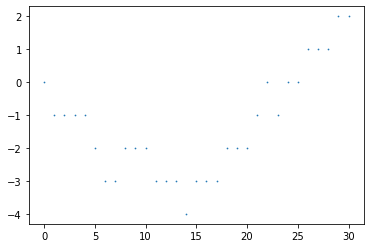

In [316]:
text_file = open("C:/Users/Jofan/Downloads/dataset_7_10 (3).txt", "r")
Text = text_file.read()  #read whole file to a string
text_file.close() #close file

Text='CATTCCAGTACTTCGATGATGGCGTGAAGA'
a=skew(Text)
plt.scatter(np.arange(len(a)),a,s=0.5)
min_value = min(a)
[i for i, x in enumerate(a) if x == min_value]

In [137]:
def HammingDistance(texta,textb):
    mis=0
#     for i in range(len(texta)):
    for i in range(min(len(texta),len(textb))):
        if texta[i]!=textb[i]:
            mis+=1
        else:
            continue
    return mis

In [310]:
texta='CAGAAAGGAAGGTCCCCATACACCGACGCACCAGTTTA'
textb='CACGCCGTATGCATAAACGAGCCGCACGAACCAGAGAG'
HammingDistance(texta,textb)


23

In [321]:
def Approximate_Pattern_Matching(Pattern,Text,d):
    match_pos=[]
    for i in range(len(Text)-len(Pattern)+1):

        Text_sub=Text[i:i+len(Pattern)]
        if HammingDistance(Pattern,Text_sub)<=d:
            match_pos.append(i)
        else:
            continue
    return match_pos
    

In [322]:
text_file = open("C:/Users/Jofan/Downloads/dataset_9_6.txt", "r")
Text = text_file.read().splitlines()
text_file.close() #close file
a=Approximate_Pattern_Matching(Text[0],Text[1],int(Text[2]))

a=Approximate_Pattern_Matching('CCC','CATGCCATTCGCATTGTCCCAGTGA',2)
print(*a)
print(len(a))

0 2 3 4 5 7 8 9 10 11 15 16 17 18 19
15


In [214]:
def Neighbors(Pattern,d):
    if d == 0:
        return Pattern
    if len(Pattern) == 1: 
        return {'A', 'C', 'G', 'T'}
#     Neighborhood=set()
    Neighborhood=[]
    SuffixNeighbors = Neighbors(Pattern[1:], d)
    for c in SuffixNeighbors:
        if HammingDistance(Pattern[1:], c)<d:
            for base in ['A','T','C','G']:
                Neighborhood.append(base+c)
#                 Neighborhood.add(base+c)
        else:
            Neighborhood.append(Pattern[0]+c)
#             Neighborhood.add(Pattern[0]+c)
    return Neighborhood

In [324]:
a=Neighbors('CCAGTCAATG',1)
print(*a)
print(len(a))

CCAGTCAATC CCAGTCAATA CCAGTCAAAG CCAGTAAATG CCAGTTAATG CCAGACAATG CCAATCAATG CCATTCAATG CCACTCAATG CAAGTCAATG CTAGTCAATG ACAGTCAATG TCAGTCAATG CCAGTCAATG GCAGTCAATG CGAGTCAATG CCTGTCAATG CCCGTCAATG CCGGTCAATG CCAGCCAATG CCAGGCAATG CCAGTGAATG CCAGTCTATG CCAGTCCATG CCAGTCGATG CCAGTCATTG CCAGTCACTG CCAGTCAGTG CCAGTCAACG CCAGTCAAGG CCAGTCAATT
31


In [245]:
def FrequentWordsWithMismatches(Text, k, d):
    Patterns =[]
    freqMap={}
    n=len(Text)
    for i in range(n-k):
        Pattern = Text[i:i+k]
        neighborhood = Neighbors(Pattern, d)
        for j in range(len(neighborhood) - 1):
            neighbor = neighborhood[j]
            if neighbor not in freqMap:
                freqMap[neighbor]= 1
            else:
                freqMap[neighbor] = freqMap[neighbor] + 1
    
    m = max(freqMap.values())
    for key in freqMap:
        if freqMap[key] == m:
            Patterns.append(key)
    return freqMap,Patterns

In [247]:
Text='CATGCCATTCGCATTGTCCCAGTGA'
m,a=FrequentWordsWithMismatches(Text, 5,2)
print(*a)

102
ACCAG


In [303]:
def ReverseComplement(Text):
    compli_dic={'A':'T','T':'A','C':'G','G':'C'}
    reverse_complement = "".join(compli_dic.get(base) for base in reversed(Text))
    return reverse_complement
def FrequentWordsWithMismatches_ds(Text, k, d):
    Patterns =[]
    freqMap={}
    freqMap2={}
    n=len(Text)
    for i in range(n-k):
        Pattern = Text[i:i+k]
        neighborhood = Neighbors(Pattern, d)
        for j in range(len(neighborhood) - 1):
            neighbor = neighborhood[j]
            if neighbor not in freqMap:
                freqMap[neighbor]= 1
            else:
                freqMap[neighbor] = freqMap[neighbor] + 1
    ## reverse complimentary
    for key in freqMap.keys():
        key_r=ReverseComplement(key)
        if key_r in freqMap.keys():
            freqMap[ReverseComplement(key_r)]=freqMap[ReverseComplement(key_r)]+freqMap[key_r]
            freqMap[key_r]=0
        
    m = max(freqMap.values())
    print(m)
    for key in freqMap:
        if freqMap[key] == m:
            Patterns.append(key)
    return freqMap,Patterns
    print(freqMap['ATGT'],freqMap['ACAT'])

In [309]:
Text='CGCGTTCCCCTTTTCTTCGTTTTTTAACCGCGTTCCGCCCAACCGCGCGTTCTTCTTAACTTCAACAACAACAACCGTTTTCCGAACAACTTCCCCGCCCAACCGCCCAACTTTTCCCAACCCCCGTTCTTCAACTTAACTTTTCCCAACCCCTTCTTCAACTTCCCCCCCCCAACTTCAACCGTTCTTTTTTCCCCTTCCGAACCG'
m,a=FrequentWordsWithMismatches_ds(Text, 6,3)
print(*a)


104
GGGAGG


In [ ]:
text_file = open("C:/Users/Jofan/Downloads/Salmonella_enterica.txt", "r")
Text = text_file.read()#.splitlines()
text_file.close() #close file
m,a=FrequentWordsWithMismatches_ds(Text, 9,3)
print(*a)